In [1]:
import json
import csv
import tweepy
import nltk
import string
import re
import pandas as pd
from IPython.display import Markdown as md
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
api_key="FyhYZQJj2BZnLiTtxks6uq8Hg"
api_key_secret ="V1HqFCBudiDcfRChZNyabFpu1kbpIFTYmtlrQuMdk9GGHKihls"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAIXeeAEAAAAAnjkZQy0qEFaEym%2Fg0enPlBc%2Fkus%3DcUlNFpIv2cKo11sWB7QHrzDAaQp90irdoDf4nfjdoZQgmkJ5jm"
access_token = "290002788-biPOSTt3vT6tcnQzAmAV8vusQ7PwgCPzVHCLn111"
access_token_secret = "JqevILEkR0Huzi6ywCtmBY0Jua63z3sBAEfzwnczQWn3U"

In [3]:
client = tweepy.Client(bearer_token, api_key, api_key_secret, access_token, access_token_secret)
auth = tweepy.OAuth1UserHandler(api_key, api_key_secret, access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
user = input("enter the user: ")
number_of_tweets = int(input("enter number of tweets: "))
tweets = []
time = []

#def rem_rt(string):
 #   x=string.split()
  #  c=0
   # for i in range(len(x)):
    #    if x[i-c][0]=='@':
     #       x.remove(x[i-c])
      #      c+=1
   # y= ' '.join(x)

    #emoji_pattern = re.compile("["
     #   u"\U0001F600-\U0001FFFF"  # emoticons
      #  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
       # u"\U0001F680-\U0001F6FF"  # transport & map symbols
        #u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
      #                     "]+", flags=re.UNICODE)
    #return emoji_pattern.sub(r'', y)
def clean_text(text):
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)
    #text=rem_rt(text)

    return text

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
j=1

for i in tweepy.Cursor(api.search_tweets, q = user, tweet_mode = "extended").items(number_of_tweets):
    tweets.append(i.full_text)
    time.append(i.created_at)
df = pd.DataFrame({'tweets':tweets, 'time':time})
df['tweets'] = df['tweets'].apply(clean_text)
df['Subjectivity'] = df['tweets'].apply(get_subjectivity)
df['Polarity'] = df['tweets'].apply(get_polarity)
df['Analysis'] = df['Polarity'].apply(analysis)
print(user)
print(number_of_tweets)

enter the user: @NigeriaGov
enter number of tweets: 20
@NigeriaGov
20


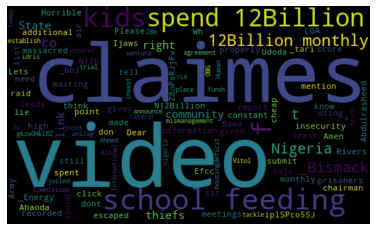

None


In [5]:
tweets = []
time = []

def clean_text(text):
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)
    #text=rem_rt(text)

    return text

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
j=1


for i in tweepy.Cursor(api.search_tweets, q = user, tweet_mode = "extended").items(number_of_tweets):
    tweets.append(i.full_text)
    time.append(i.created_at)
    
df = pd.DataFrame({'tweets':tweets, 'time':time})
df['tweets'] = df['tweets'].apply(clean_text)
df['Subjectivity'] = df['tweets'].apply(get_subjectivity)
df['Polarity'] = df['tweets'].apply(get_polarity)
df['Analysis'] = df['Polarity'].apply(analysis)

all_words = ' '.join( [twts for twts in df['tweets']])
word_Cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)
plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
print(plt.show())


In [6]:
tweets = []
time = []

def clean_text(text):
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)
    #text=rem_rt(text)

    return text

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
j=1


for i in tweepy.Cursor(api.search_tweets, q = user, tweet_mode = "extended").items(number_of_tweets):
    tweets.append(i.full_text)
    time.append(i.created_at)
    
df = pd.DataFrame({'tweets':tweets, 'time':time})
df['tweets'] = df['tweets'].apply(clean_text)
df['Subjectivity'] = df['tweets'].apply(get_subjectivity)
df['Polarity'] = df['tweets'].apply(get_polarity)
df['Analysis'] = df['Polarity'].apply(analysis)
df['Analysis'].value_counts()

Neutral     15
Negative     3
Positive     2
Name: Analysis, dtype: int64

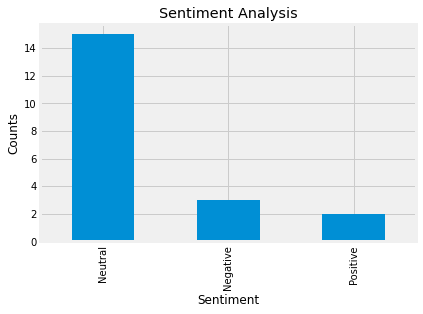

None


In [7]:
tweets = []
time = []

def clean_text(text):
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)
    #text=rem_rt(text)

    return text

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
j=1


for i in tweepy.Cursor(api.search_tweets, q = user, tweet_mode = "extended").items(number_of_tweets):
    tweets.append(i.full_text)
    time.append(i.created_at)
    
df = pd.DataFrame({'tweets':tweets, 'time':time})
df['tweets'] = df['tweets'].apply(clean_text)
df['Subjectivity'] = df['tweets'].apply(get_subjectivity)
df['Polarity'] = df['tweets'].apply(get_polarity)
df['Analysis'] = df['Polarity'].apply(analysis)

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
print(plt.show())


In [8]:
tweets = []
time = []

def clean_text(text):
    text = re.sub(r'@[A-Za-z09]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/?', '', text)
    #text=rem_rt(text)

    return text

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
j=1


for i in tweepy.Cursor(api.search_tweets, q = user, tweet_mode = "extended").items(number_of_tweets):
    tweets.append(i.full_text)
    time.append(i.created_at)
df = pd.DataFrame({'tweets':tweets, 'time':time})
df['tweets'] = df['tweets'].apply(clean_text)
df['Subjectivity'] = df['tweets'].apply(get_subjectivity)
df['Polarity'] = df['tweets'].apply(get_polarity)
df['Analysis'] = df['Polarity'].apply(analysis)

df

,tweets,time,Subjectivity,Polarity,Analysis
0,": Dear _Energy ,\n\nDid you tell that your m...",2022-07-06 08:11:41+00:00,0.000000,0.000000,Neutral
1,\nWe are still waiting for the Kuje escaped...,2022-07-06 08:09:04+00:00,0.470000,-0.070000,Negative
2,: The through claimes to spend ₦12Billion mo...,2022-07-06 08:09:02+00:00,0.000000,0.000000,Neutral
3,_bbJ Amen!!!🙏🏾,2022-07-06 08:07:54+00:00,0.000000,0.000000,Neutral
4,The report the link below leads to also giv...,2022-07-06 08:07:37+00:00,0.000000,0.000000,Neutral
5,: The through claimes to spend ₦12Billion mo...,2022-07-06 08:07:21+00:00,0.000000,0.000000,Neutral
6,_tari: 30 Ijaws has been massacred by Nigeria ...,2022-07-06 08:07:18+00:00,0.333333,0.000000,Neutral
7,"Horrible, but I don’t think this video was ...",2022-07-06 08:05:56+00:00,1.000000,-1.000000,Negative
8,you dont need to lie to score a cheap point...,2022-07-06 08:03:14+00:00,0.700000,0.400000,Positive
9,_Bismack: The through claimes to spend N12Bi...,2022-07-06 08:02:46+00:00,0.100000,-0.100000,Negative
